## CM2604 Machine Learning
##### Name: Chirath Shamika Setunge
##### RGU ID: 2330910
##### IIT ID: 20230374
##### Decemeber 2024

## Bank Marketing Dataset

## EDA - Exploratory Data Analysis

##### The dataset was taken from the UCI Machine Learning Repository.

In [248]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# load the data
df = pd.read_csv('bank-full.csv', delimiter=';') # use the delimiter to separate the columns as the data is separated by ';'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [250]:
# identify the number of rows and columns(features) in the dataset  
print("The number of rows in the dataset is", df.shape[0])
print("The number of columns (features) in the dataset is", df.shape[1])

The number of rows in the dataset is 45211
The number of columns (features) in the dataset is 17


In [251]:
# identify the data types of the columns(features)
print("The data types of the columns (features) in the dataset are:")
print(df.dtypes)

The data types of the columns (features) in the dataset are:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [252]:
# identify the number of missing values in the dataset
print("The number of missing values in the dataset is:")
print(df.isnull().sum())

The number of missing values in the dataset is:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [253]:
# identify the number of duplicate rows in the dataset
print("The number of duplicate rows in the dataset is:", df.duplicated().sum())

The number of duplicate rows in the dataset is: 0


In [254]:
# indentify the categorical features in the dataset
print("The categorical features in the dataset are (except the target column (y)):")
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = [feature for feature in categorical_features if feature != 'y']
print(categorical_features)

The categorical features in the dataset are (except the target column (y)):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [255]:
# identify the unique values in the categorical features
print("The unique values in the categorical features are:")
for feature in categorical_features:
    print(feature)
    print(df[feature].unique())
    print(f"The number of unique values in the feature {feature} is {len(df[feature].unique())}")
    print('-----------------------------------')

The unique values in the categorical features are:
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
The number of unique values in the feature job is 12
-----------------------------------
marital
['married' 'single' 'divorced']
The number of unique values in the feature marital is 3
-----------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
The number of unique values in the feature education is 4
-----------------------------------
default
['no' 'yes']
The number of unique values in the feature default is 2
-----------------------------------
housing
['yes' 'no']
The number of unique values in the feature housing is 2
-----------------------------------
loan
['no' 'yes']
The number of unique values in the feature loan is 2
-----------------------------------
contact
['unknown' 'cellular' 'telephone']
The number of unique values in the feature contac

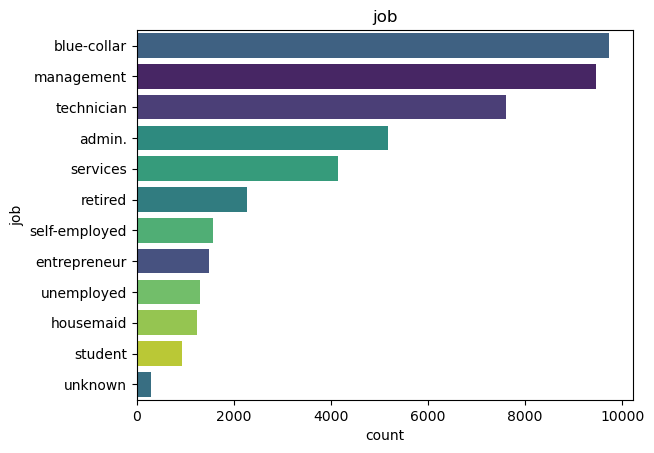

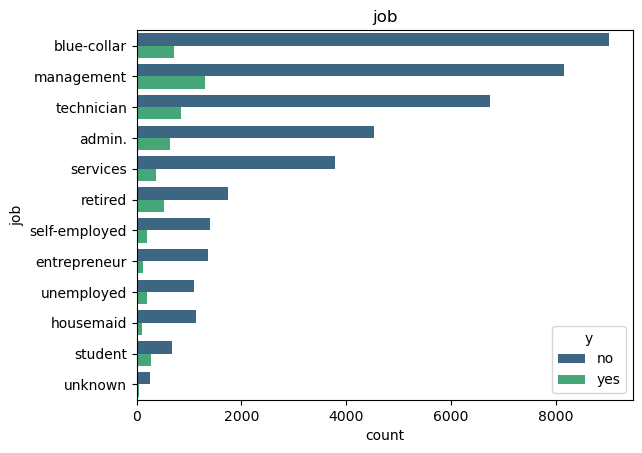

y                no   yes
job                      
management     8157  1301
technician     6757   840
blue-collar    9024   708
admin.         4540   631
retired        1748   516
services       3785   369
student         669   269
unemployed     1101   202
self-employed  1392   187
entrepreneur   1364   123
housemaid      1131   109
unknown         254    34


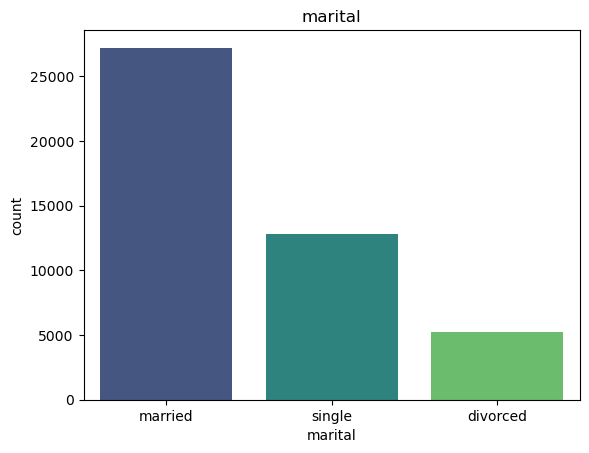

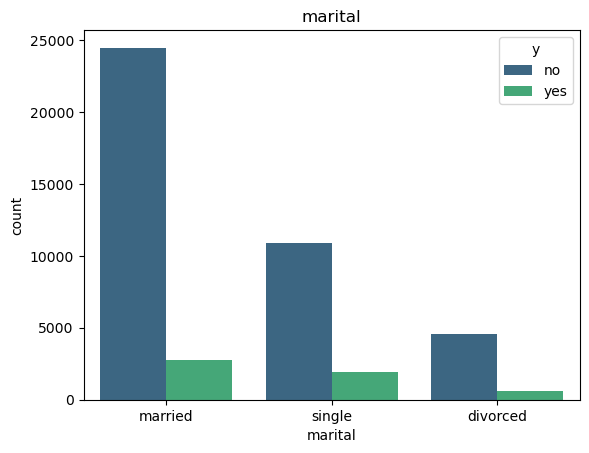

y            no   yes
marital              
married   24459  2755
single    10878  1912
divorced   4585   622


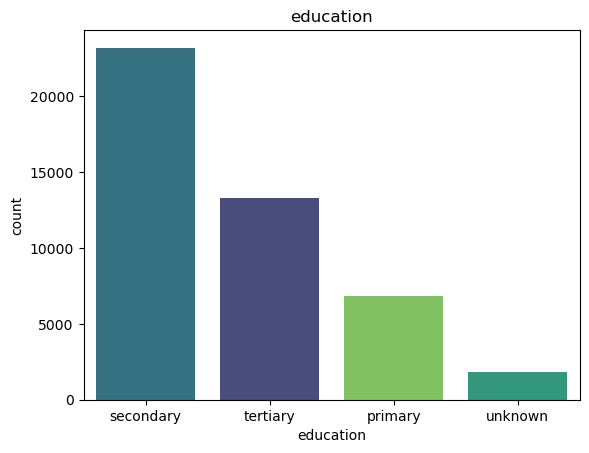

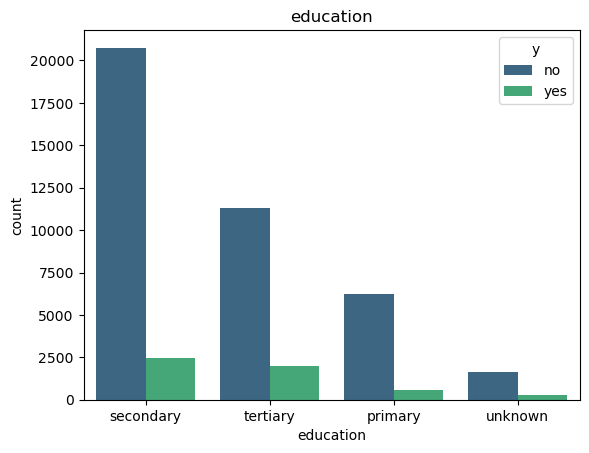

y             no   yes
education             
secondary  20752  2450
tertiary   11305  1996
primary     6260   591
unknown     1605   252


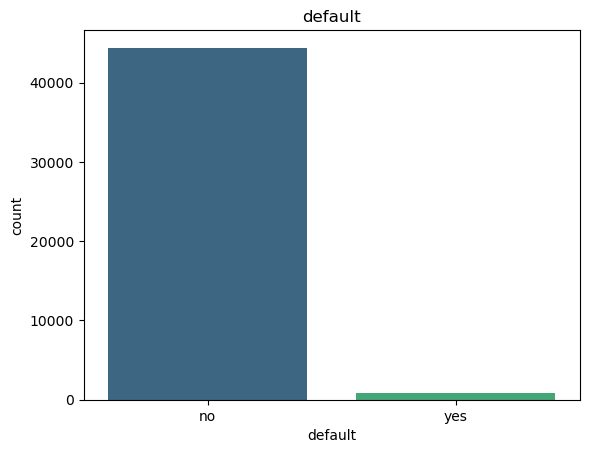

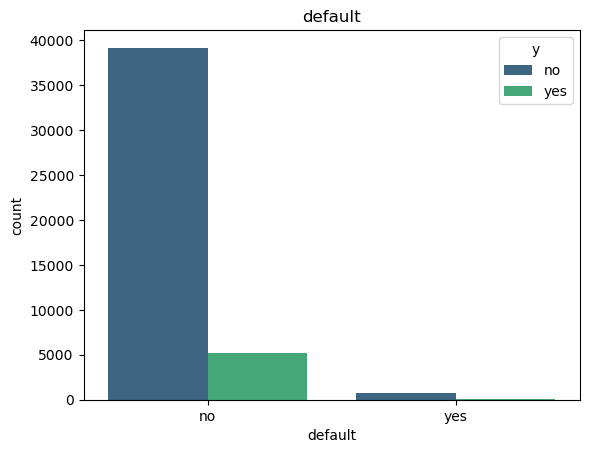

y           no   yes
default             
no       39159  5237
yes        763    52


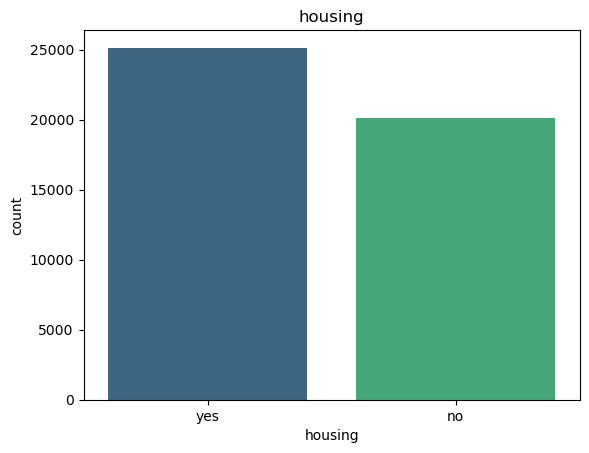

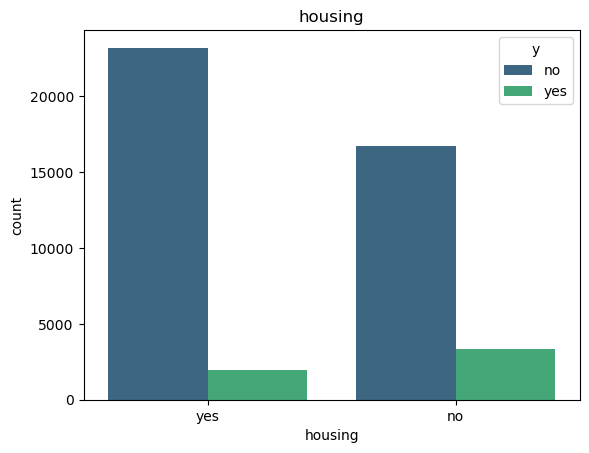

y           no   yes
housing             
no       16727  3354
yes      23195  1935


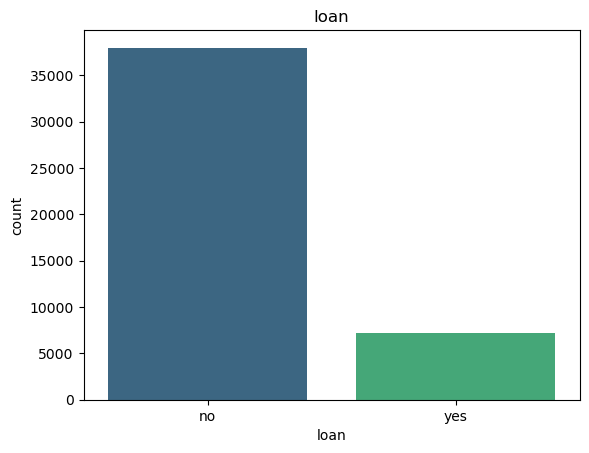

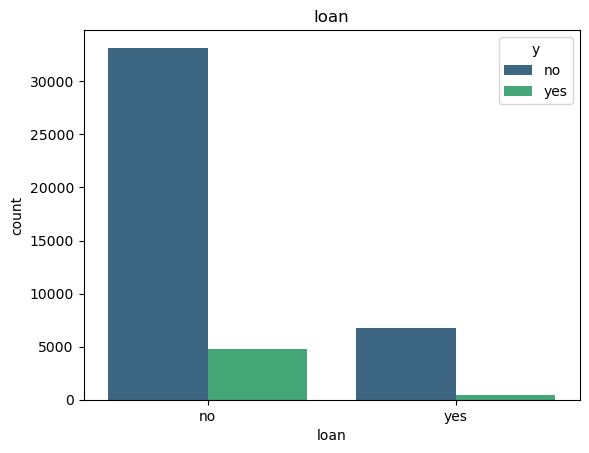

y        no   yes
loan             
no    33162  4805
yes    6760   484


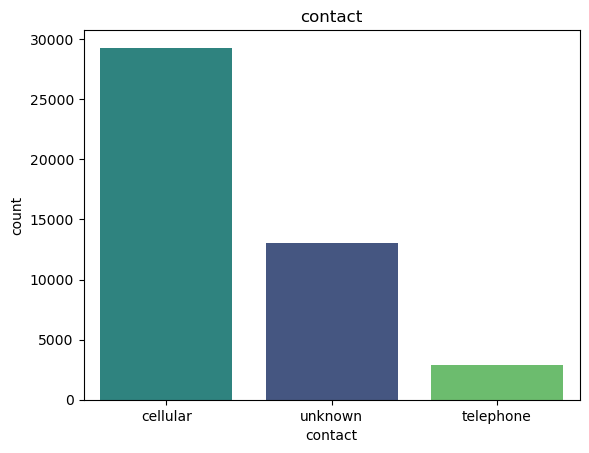

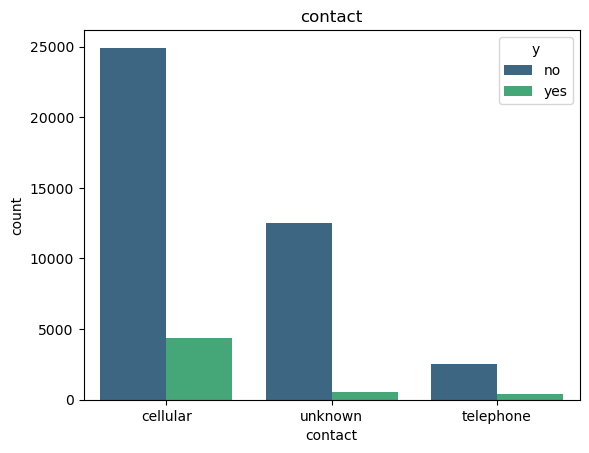

y             no   yes
contact               
cellular   24916  4369
unknown    12490   530
telephone   2516   390


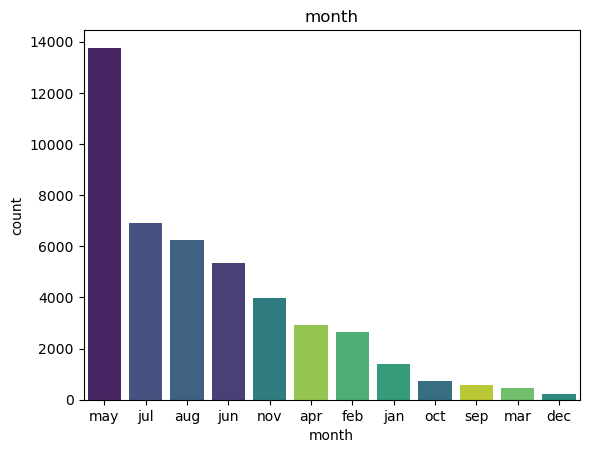

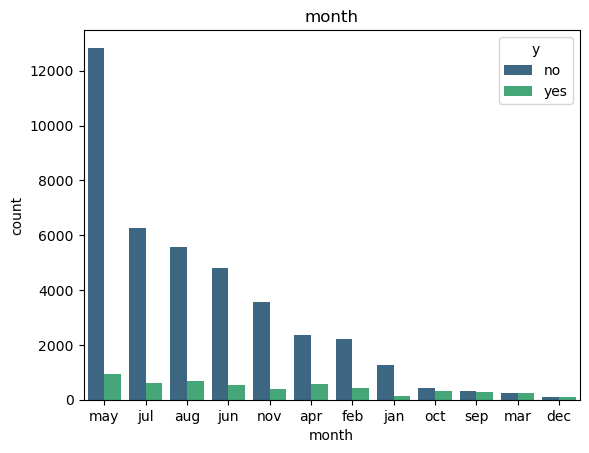

y         no  yes
month            
may    12841  925
aug     5559  688
jul     6268  627
apr     2355  577
jun     4795  546
feb     2208  441
nov     3567  403
oct      415  323
sep      310  269
mar      229  248
jan     1261  142
dec      114  100


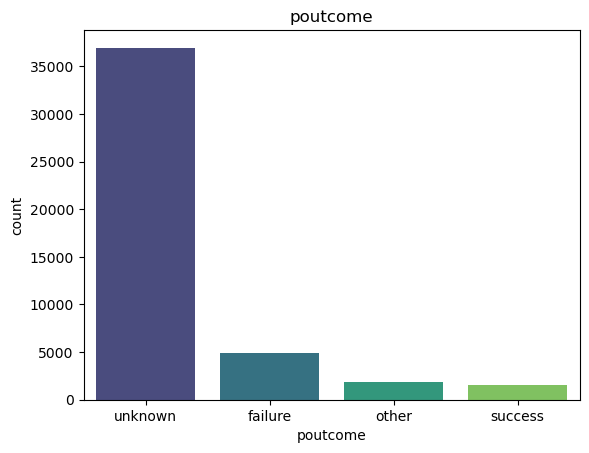

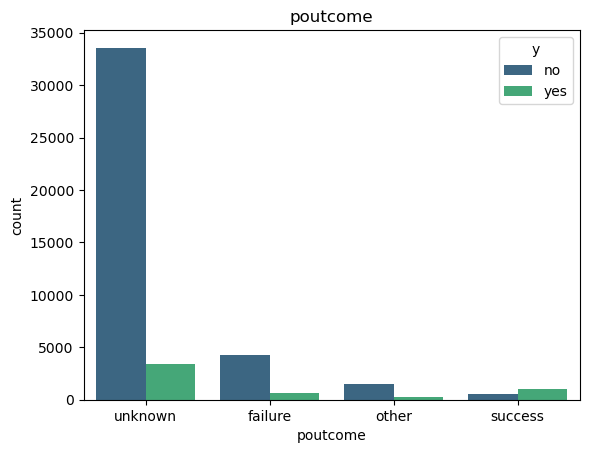

y            no   yes
poutcome             
unknown   33573  3386
success     533   978
failure    4283   618
other      1533   307


In [256]:
# identify the distribution of the categorical features
for feature in categorical_features:
    # order the categories based on their count
    order = df[feature].value_counts().index
    if feature == 'job':
        sns.countplot(y=feature, data=df, hue=feature, palette='viridis', order=order)
        plt.title(feature)
        plt.show()
        # indentify the distribution of the categorical features with respect to the target column
        sns.countplot(y=feature, data=df, hue='y', palette='viridis', order=order)
        plt.title(feature)
        plt.show() 
        # check the distribution of the categorical features with respect to the target column with value counts
        print(df.groupby([feature, 'y']).size().unstack().sort_values(by='yes', ascending=False))
    else:
        sns.countplot(x=feature, data=df, hue=feature, palette='viridis', order=order)
        plt.title(feature)
        plt.show()
        # check the distribution of the categorical features with respect to the target column 
        sns.countplot(x=feature, data=df, hue='y', palette='viridis', order=order)
        plt.title(feature)
        plt.show()
        # check the distribution of the categorical features with respect to the target column with value counts order yes
        print(df.groupby([feature, 'y']).size().unstack().sort_values(by='yes', ascending=False))

In [257]:
# identify the numerical features in the dataset
print("The numerical features in the dataset are:")
numerical_features = df.select_dtypes(include=['int64']).columns
print(numerical_features)

The numerical features in the dataset are:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [258]:
# identify the descriptive statistics of the numerical features (at once)
print("The descriptive statistics of the numerical features are:")
print(df[numerical_features].describe())

The descriptive statistics of the numerical features are:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%  

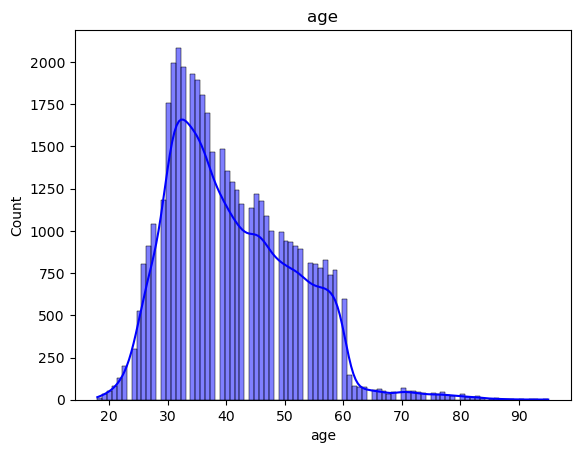

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


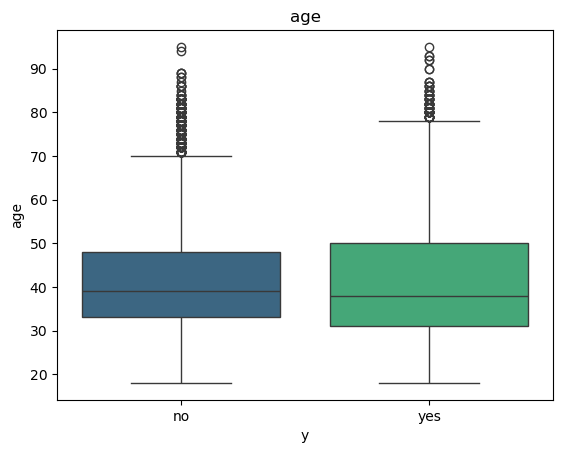

-----------------------------------


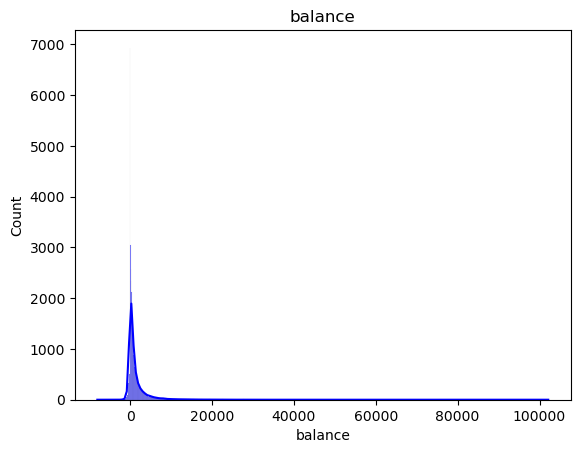

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


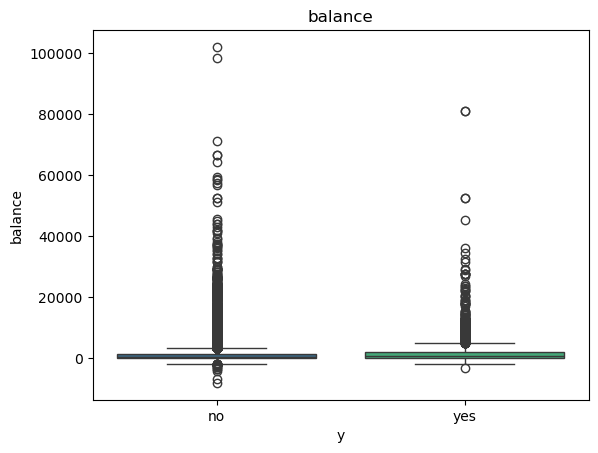

-----------------------------------


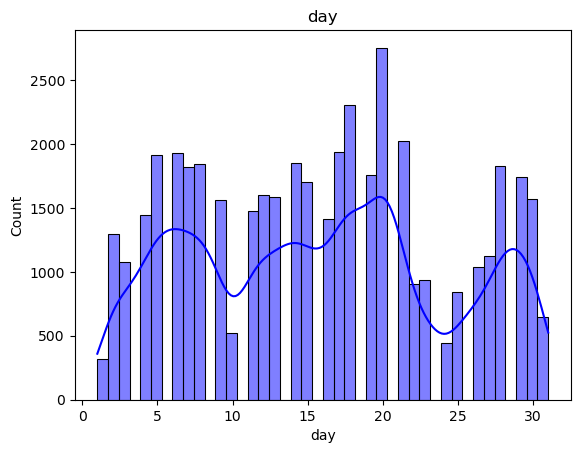

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


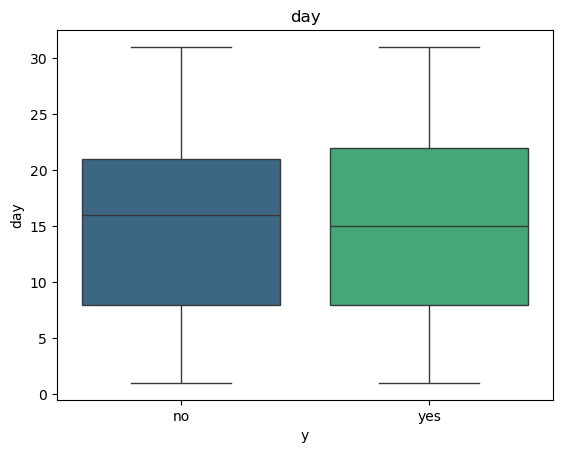

-----------------------------------


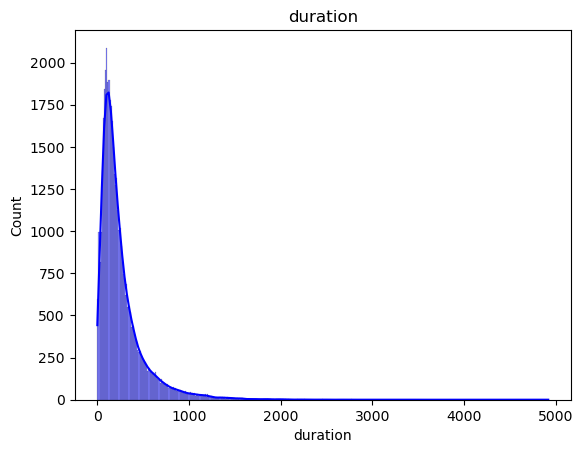

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


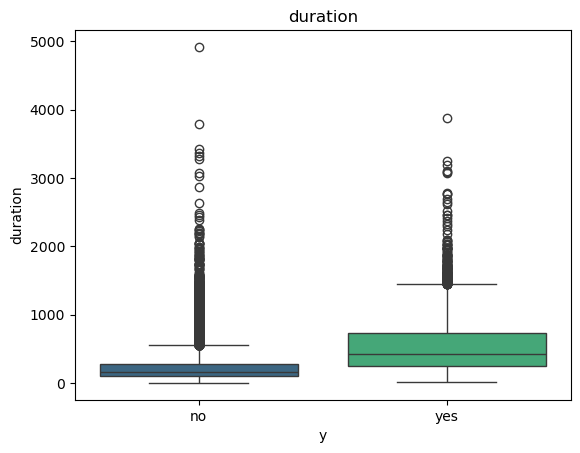

-----------------------------------


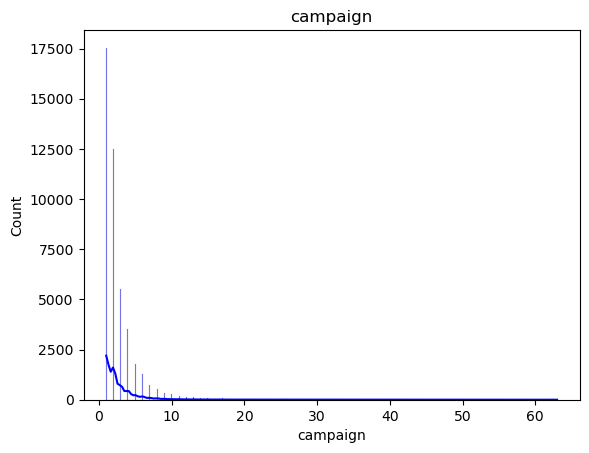

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


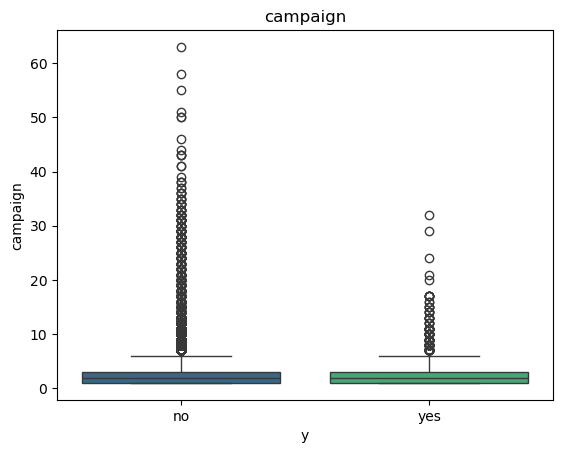

-----------------------------------


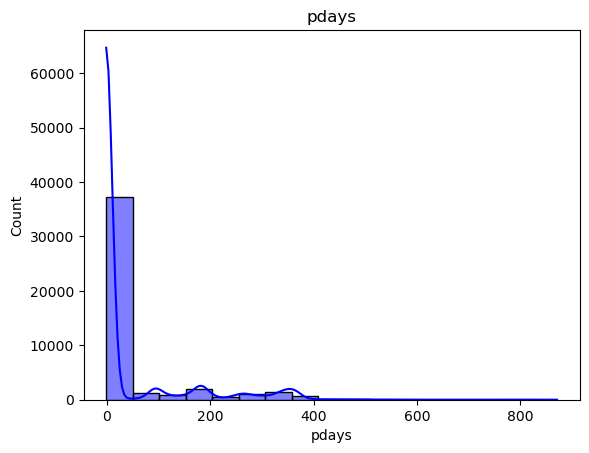

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


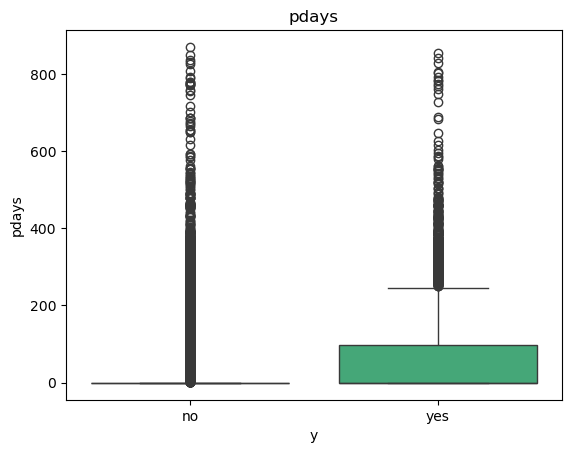

-----------------------------------


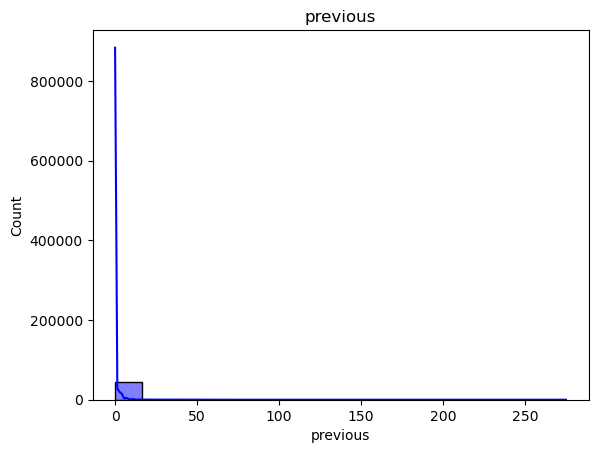

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


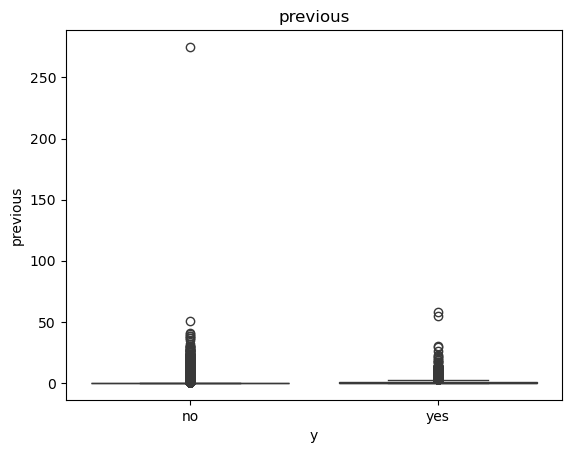

-----------------------------------


In [259]:
# indentify the distribution of the numerical features
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(feature)
    plt.show()
    # display the discriptive statistics for each numerical feature
    print(df[feature].describe())
    # identify the distribution of the numerical features with respect to the target column
    sns.boxplot(x='y', y=feature, data=df, hue='y', palette='viridis')
    plt.title(feature)
    plt.show()
    print('-----------------------------------')

#### Idntifying the class imbalance

The distribution of the target column (y) is:
no     39922
yes     5289
Name: y, dtype: int64


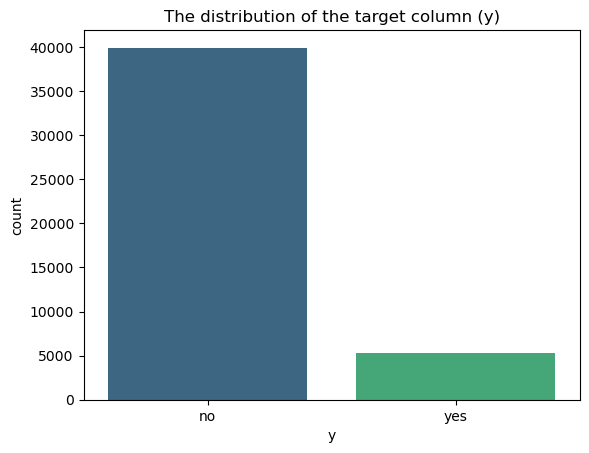

In [260]:
# identify the distribution of the target column
print("The distribution of the target column (y) is:")
print(df['y'].value_counts())
sns.countplot(x='y', data=df, hue='y', palette='viridis')
plt.title('The distribution of the target column (y)')
plt.show()

In [261]:
# encode the target column
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

#### Hnadle outliers

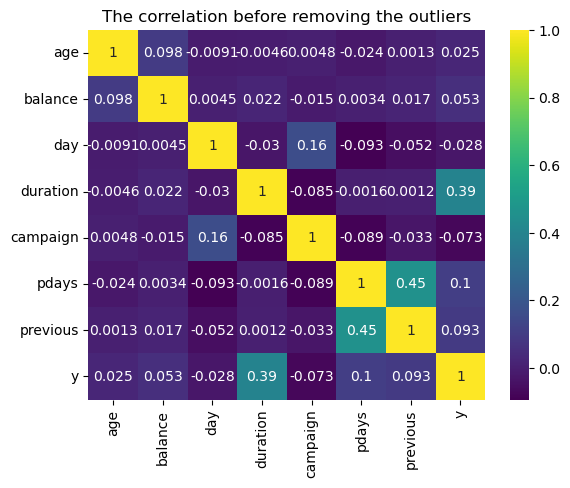

In [ ]:
# indentify the correlation between the numerical features and the target column (y) before removing the outliers
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('The correlation before removing the outliers')
plt.show()

In [310]:
# how many value are there in previous column that are latger than 0
print("The number of values in the 'previous' column that are larger than 0 is:", df[df['previous'] > 0].shape[0])

The number of values in the 'previous' column that are larger than 0 is: 8257


In [311]:
# how many values are tere in duration column that are larger than 4000
print("The number of values in the 'duration' column that are larger than 2000 is:", df[df['duration'] > 2000].shape[0])

The number of values in the 'duration' column that are larger than 2000 is: 59


In [312]:
# how many values are there in campaign column that are larger than 50
print("The number of values in the 'campaign' column that are larger than 50 is:", df[df['campaign'] > 50].shape[0])

The number of values in the 'campaign' column that are larger than 50 is: 4


In [263]:
# take a copy of the dataset to handle the dataset
df2 = df.copy()

In [264]:
# handle the outliers in the numerical features using the winsorization method
from scipy.stats.mstats import winsorize

In [265]:
# apply the winsorization method to the numerical features with relevant limits
df2['campaign'] = winsorize(df2['campaign'], limits=[0, 0.005])
df2['balance'] = winsorize(df2['balance'], limits=[0, 0.01])
df2['duration'] = winsorize(df2['duration'], limits=[0, 0.005])
df2['pdays'] = winsorize(df2['pdays'], limits=[0, 0.01])
df2['previous'] = winsorize(df2['previous'], limits=[0, 0.01])

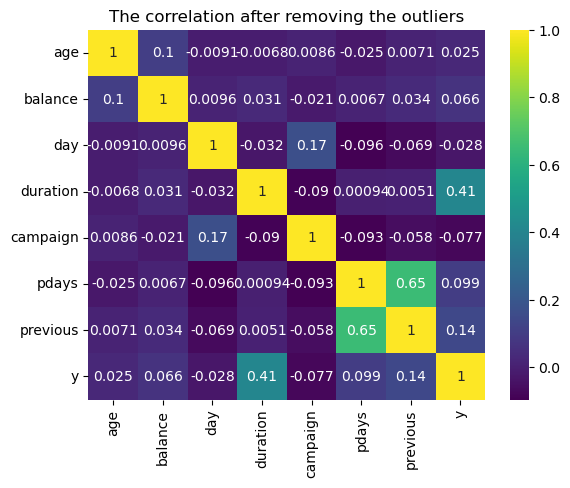

In [266]:
# indentify the distribution of the numerical features and the target column (y) after removing the outliers
correlation = df2.corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('The correlation after removing the outliers')
plt.show()

### Enocode the categorical features 

In [267]:
# apply ordianl encoding to the categorical features (education) because it has an ranking order
education_grading = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df2['education'] = df2['education'].map(education_grading)

In [268]:
# apply one-hot encoding to the categorical features because they don't have an ranking order
df2 = pd.get_dummies(df2, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

### Train-Test split

In [269]:
# split the dataset into test and train datasets
from sklearn.model_selection import train_test_split

X = df2.drop('y', axis=1)
y = df2['y']
# stratify the target column to ensure that the distribution of the target column is the same in both the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Transformaing numerical features

##### 1st the Train set with fit_transform
##### 2nd the Test set with transofrm

In [270]:
# scale the numerical features using the standard scaler
from sklearn.preprocessing import StandardScaler

scalerObj = StandardScaler()
X_train[numerical_features] = scalerObj.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scalerObj.transform(X_test[numerical_features])

In [271]:
# check the shape of the train and test datasets
print("The shape of the train dataset is", X_train.shape)
print("The shape of the test dataset is", X_test.shape)

The shape of the train dataset is (36168, 40)
The shape of the test dataset is (9043, 40)


### Model building

#### Random Forest

In [283]:
# GridSearchCV to find the best hyperparameters for the models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

GridRF = RandomForestClassifier(random_state=42)

parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search_rf = GridSearchCV(estimator=GridRF, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("The best hyperparameters for the Random Forest Classifier are:")
print(grid_search_rf.best_params_)
print("The best score for the Random Forest Classifier is:", grid_search_rf.best_score_)
print("The best estimator for the Random Forest Classifier is:", grid_search_rf.best_estimator_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min

/opt/miniconda3/envs/ml/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The best hyperparameters for the Random Forest Classifier are:
{'class_weight': 'balanced_subsample', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
The best score for the Random Forest Classifier is: 0.9057177615571775
The best estimator for the Random Forest Classifier is: RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_split=5, n_estimators=300, random_state=42)
-----------------------------------


#### Best hyperparameters for Random Forest
{'class_weight': 'balanced_subsample', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

In [300]:
# build the Raaandom Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RandomFroestModel = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=30, class_weight='balanced_subsample', min_samples_split=5)
RandomFroestModel.fit(X_train, y_train)

y_predRF = RandomFroestModel.predict(X_test)

print("The accuracy of the Random Forest model is", accuracy_score(y_test, y_predRF))
print("The confusion matrix of the Random Forest model is")
print(confusion_matrix(y_test, y_predRF))
print("The classification report of the Random Forest model is")
print(classification_report(y_test, y_predRF))

The accuracy of the Random Forest model is 0.90755280327325
The confusion matrix of the Random Forest model is
[[7658  327]
 [ 509  549]]
The classification report of the Random Forest model is
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7985
           1       0.63      0.52      0.57      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.74      0.76      9043
weighted avg       0.90      0.91      0.90      9043



### Evaluate the model (Random Forest)

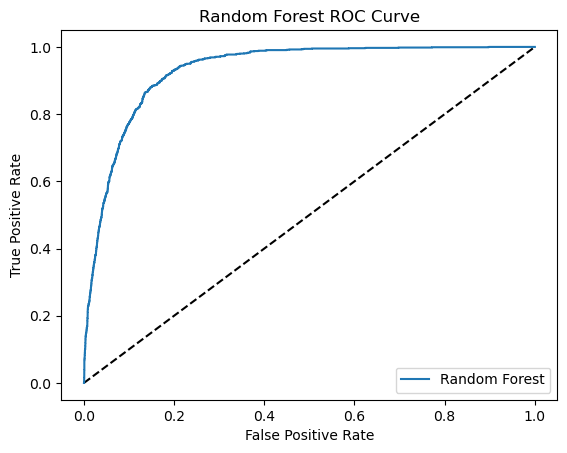

The AUC score of the Random Forest model is 0.9309560814049974


In [301]:
# Evaluate the random forest model using ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_probRF = RandomFroestModel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probRF)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# calculate the AUC score
print("The AUC score of the Random Forest model is", roc_auc_score(y_test, y_pred_probRF))

### balance the class imbalance on train set for Neural Network

In [277]:
# balance the dataset using the SMOTE technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### Neuaral Network

In [303]:
# build the neural network model from tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

nn_model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

y_predNN = nn_model.predict(X_test)
y_predNN = [1 if x > 0.5 else 0 for x in y_predNN]

print("The accuracy of the Neural Network model is", accuracy_score(y_test, y_predNN))
print("The confusion matrix of the Neural Network model is")
print(confusion_matrix(y_test, y_predNN))
print("The classification report of the Neural Network model is")
print(classification_report(y_test, y_predNN))


Epoch 1/50


/opt/miniconda3/envs/ml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 557us/step - accuracy: 0.8978 - loss: 0.2485 - val_accuracy: 0.9027 - val_loss: 0.2124
Epoch 2/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step - accuracy: 0.9047 - loss: 0.2108 - val_accuracy: 0.8994 - val_loss: 0.2112
Epoch 3/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step - accuracy: 0.9082 - loss: 0.2021 - val_accuracy: 0.9081 - val_loss: 0.2014
Epoch 4/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step - accuracy: 0.9099 - loss: 0.1948 - val_accuracy: 0.9086 - val_loss: 0.2014
Epoch 5/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 536us/step - accuracy: 0.9118 - loss: 0.1919 - val_accuracy: 0.9081 - val_loss: 0.1986
Epoch 6/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step - accuracy: 0.9165 - loss: 0.1820 - val_accuracy: 0.9067 - val_loss: 0.2027
Epoch 7/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step - accuracy: 0.9142 - loss: 0.1848 - val_accuracy: 0.9079 - val_loss: 0.2020
Epoch 8/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step - accuracy: 0.9169 - loss: 0.17

#### Evaluate the model (Neural network)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


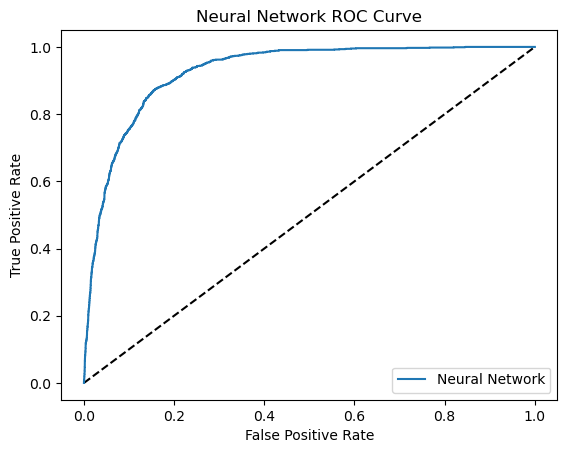

The AUC score of the Neural Network model is 0.9264235990686697


In [306]:
# evaluate the model using the ROC curve
y_pred_probNN = nn_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probNN)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend()
plt.show()

# calculate the AUC score
print("The AUC score of the Neural Network model is", roc_auc_score(y_test, y_pred_probNN))

### Experimental Results

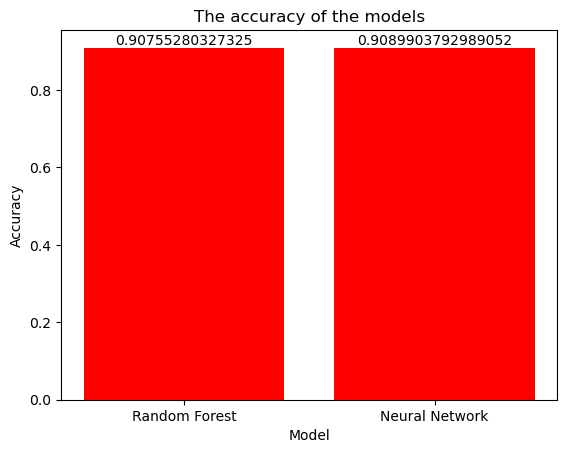

In [307]:
# plot the accuracy of the models
accuracy = [accuracy_score(y_test, y_predRF), accuracy_score(y_test, y_predNN)]
model = ['Random Forest', 'Neural Network']

plt.bar(model, accuracy, color='red')
# add the accuracy values on the bars
for i in range(len(accuracy)):
    plt.text(i, accuracy[i], accuracy[i], ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('The accuracy of the models')
plt.show()

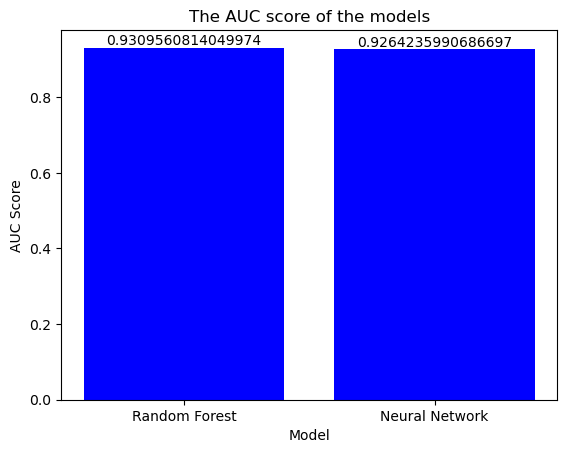

In [308]:
# plot the AUC score of the models
auc_score = [roc_auc_score(y_test, y_pred_probRF), roc_auc_score(y_test, y_pred_probNN)]
model = ['Random Forest', 'Neural Network']

plt.bar(model, auc_score, color='blue')
# add the auc score values on the bars
for i in range(len(auc_score)):
    plt.text(i, auc_score[i], auc_score[i], ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('The AUC score of the models')
plt.show()

